In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
genes= [ 'Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5' ]
cols= [ 'Control_1', 'Control_2', 'Control_3', 'Treatment_1', 'Treatment_2','Treatment_3' ]

data=[
    [120,135,128,280,295,310],
    [500, 480, 520, 490, 510, 505],
    [50, 55, 48,20, 18, 22],
    [200, 190, 210, 195, 205, 200],
    [800, 820, 790, 810, 795, 815]
]
df= pd.DataFrame(data, index=genes, columns=cols)
df


,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3
Gene1,120,135,128,280,295,310
Gene2,500,480,520,490,510,505
Gene3,50,55,48,20,18,22
Gene4,200,190,210,195,205,200
Gene5,800,820,790,810,795,815


In [222]:
df.shape

(5, 6)

In [223]:
df.describe()

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,334.000000,336.000000,339.200000,359.00000,364.600000,370.400000
std,311.897419,314.511526,309.032684,303.57042,298.677585,304.077786
min,50.000000,55.000000,48.000000,20.00000,18.000000,22.000000
25%,120.000000,135.000000,128.000000,195.00000,205.000000,200.000000
50%,200.000000,190.000000,210.000000,280.00000,295.000000,310.000000
75%,500.000000,480.000000,520.000000,490.00000,510.000000,505.000000
max,800.000000,820.000000,790.000000,810.00000,795.000000,815.000000


In [224]:
#Seperate Columns and Rows
control_col= [i for i in df.columns if 'Control' in i]
treatment_col= [i for i in df.columns if 'Treatment' in i]
gene_rows = df.index.tolist()


print(control_col)
print(treatment_col)
print(gene_rows)

['Control_1', 'Control_2', 'Control_3']
['Treatment_1', 'Treatment_2', 'Treatment_3']
['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']


In [225]:
#create DataFreame
control_df= df[control_col]
treatment_df= df[treatment_col]
gene_df = df.iloc[0]

print(control_df)
print(treatment_df)
print(gene_df)

       Control_1  Control_2  Control_3
Gene1        120        135        128
Gene2        500        480        520
Gene3         50         55         48
Gene4        200        190        210
Gene5        800        820        790
       Treatment_1  Treatment_2  Treatment_3
Gene1          280          295          310
Gene2          490          510          505
Gene3           20           18           22
Gene4          195          205          200
Gene5          810          795          815
Control_1      120
Control_2      135
Control_3      128
Treatment_1    280
Treatment_2    295
Treatment_3    310
Name: Gene1, dtype: int64


In [226]:
#Finding Mean
df['Control_mean'] = df[control_col].mean(axis=1)
df['Treatment_mean']= df[treatment_col].mean(axis=1)

df

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean
Gene1,120,135,128,280,295,310,127.666667,295.000000
Gene2,500,480,520,490,510,505,500.000000,501.666667
Gene3,50,55,48,20,18,22,51.000000,20.000000
Gene4,200,190,210,195,205,200,200.000000,200.000000
Gene5,800,820,790,810,795,815,803.333333,806.666667


In [227]:
#log2fold
df['Log2Fold'] = np.log2(df['Treatment_mean']/ df['Control_mean'])

df['Status'] = 'No change'
df.loc[df['Log2Fold'] > 0, 'Status' ] = 'Upregulated'
df.loc[df['Log2Fold' ] < 0 , 'Status']= 'Downregulated'
df

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean,Log2Fold,Status
Gene1,120,135,128,280,295,310,127.666667,295.000000,1.208333,Upregulated
Gene2,500,480,520,490,510,505,500.000000,501.666667,0.004801,Upregulated
Gene3,50,55,48,20,18,22,51.000000,20.000000,-1.350497,Downregulated
Gene4,200,190,210,195,205,200,200.000000,200.000000,0.000000,No change
Gene5,800,820,790,810,795,815,803.333333,806.666667,0.005974,Upregulated


In [228]:
# print(average_treatment.max())
treat_mean=df['Treatment_mean']
sorted_treat= treat_mean.sort_values()
max_treat= sorted_treat[::-1].head(1)
print(max_treat)

Gene5    806.666667
Name: Treatment_mean, dtype: float64


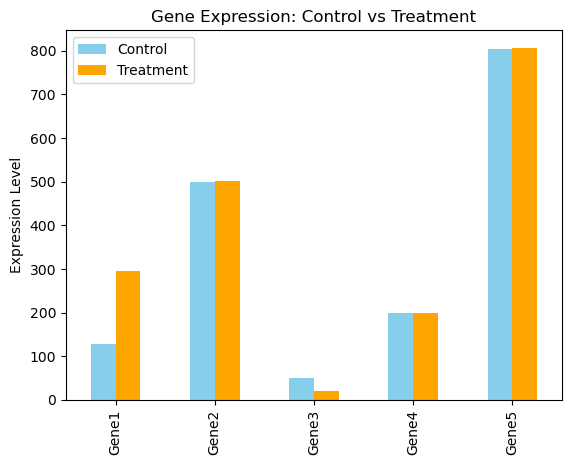

In [229]:
#Visulaozations
mean_df= pd.DataFrame( {
    'Control' : df['Control_mean'],
    'Treatment' : df['Treatment_mean']
})

mean_df.plot(kind='bar', y=['Control', 'Treatment'], color=['skyblue','orange'])
plt.title('Gene Expression: Control vs Treatment')
plt.ylabel('Expression Level')
plt.show()

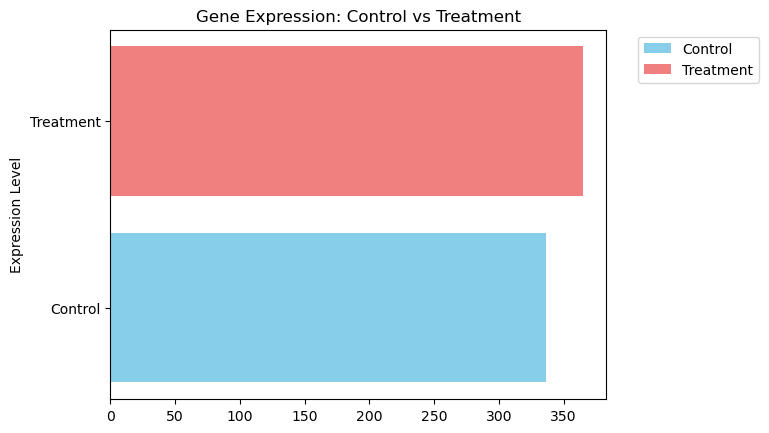

In [230]:
Control_mean = df["Control_mean"].mean()
Treatment_mean = df["Treatment_mean"].mean()

bars=plt.barh(
            ["Control", "Treatment"],
            [ Control_mean,Treatment_mean],
            color=["skyblue", "lightcoral"])


plt.title('Gene Expression: Control vs Treatment')
plt.ylabel("Expression Level")
plt.legend(bars,["Control","Treatment"],
              bbox_to_anchor=(1.05,1),
              loc="upper left")
plt.show()

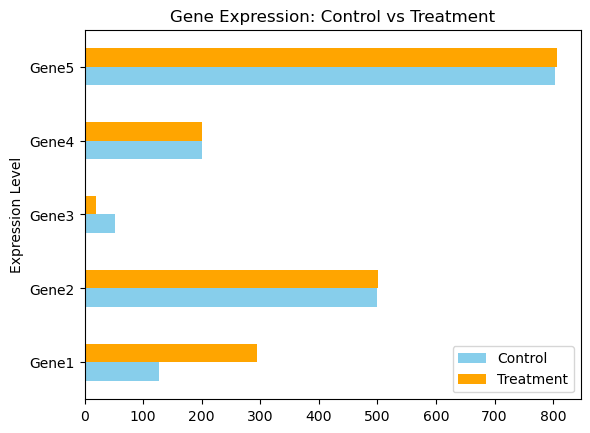

In [231]:
#Horizontal Barchart
mean_df.plot(kind='barh', y=['Control', 'Treatment'], color=['skyblue','orange'])
plt.title('Gene Expression: Control vs Treatment')
plt.ylabel('Expression Level')
plt.show()

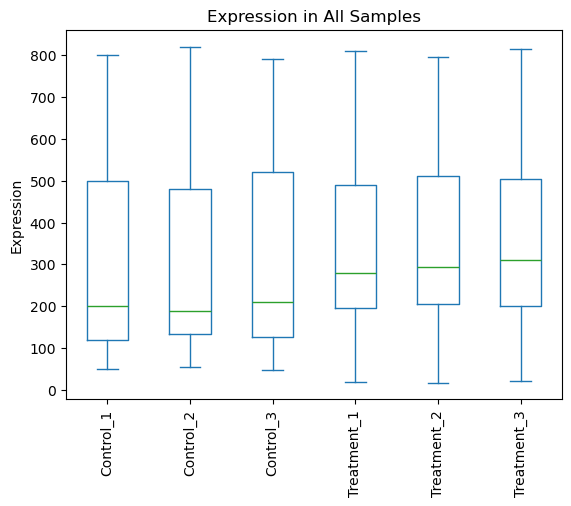

In [232]:
#BoxPlot
df[['Control_1','Control_2','Control_3', 'Treatment_1', 'Treatment_2','Treatment_3',]].plot(kind='box')
plt.title('Expression in All Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)
plt.show()

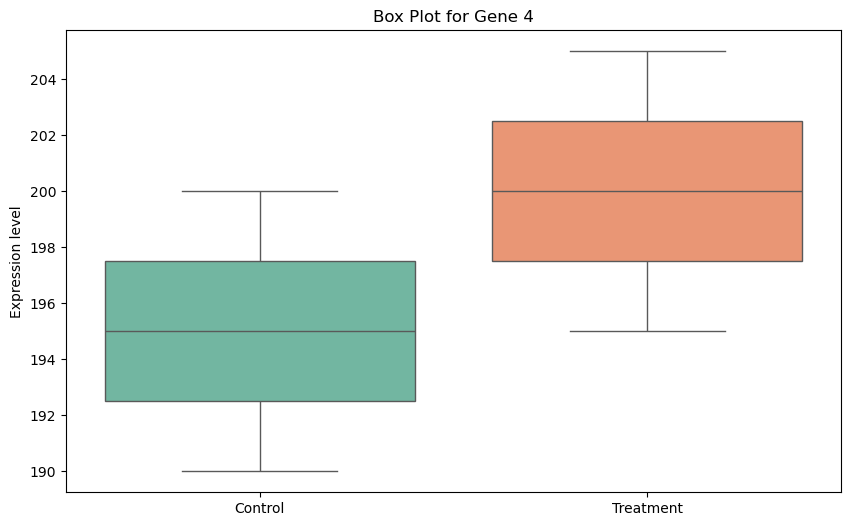

In [237]:
gene_data= df.loc['Gene4']

control_data = gene_data[["Control_1", "Control_2"]].values
treatment_data = gene_data[["Treatment_1", "Treatment_2"]].values

plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data], palette="Set2")

plt.xticks([0,1], ['Control','Treatment'])
plt.title(f"Box Plot for Gene 4")
plt.ylabel('Expression level')
plt.show()

In [235]:
gene_data= df.loc[["Gene1", "Gene2"]]
gene_data

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean,Log2Fold,Status
Gene1,120,135,128,280,295,310,127.666667,295.000000,1.208333,Upregulated
Gene2,500,480,520,490,510,505,500.000000,501.666667,0.004801,Upregulated


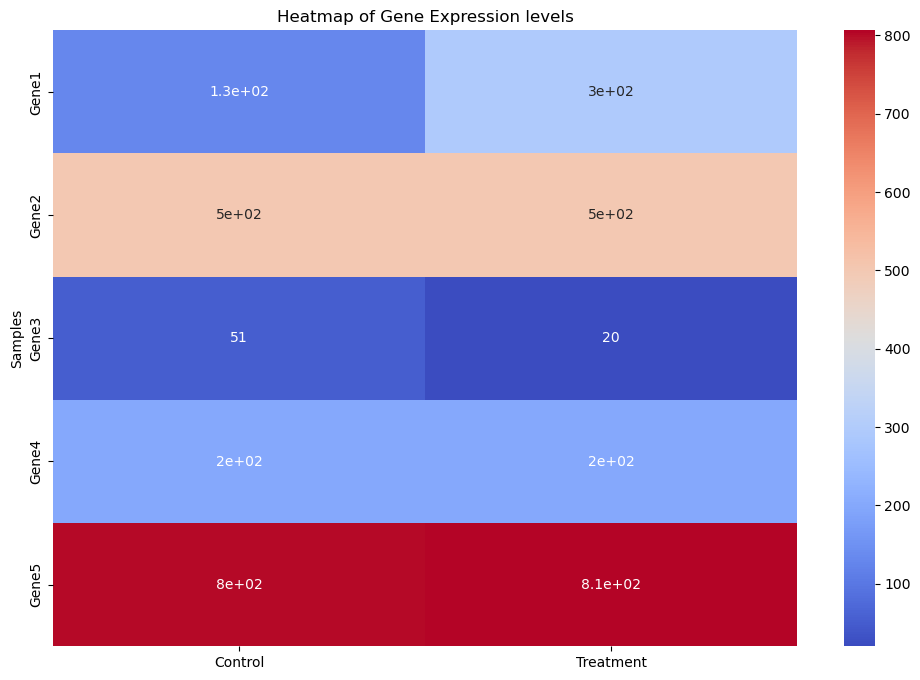

In [160]:
#Heatmap
mean_df= pd.DataFrame( {
    'Control' : df['Control_mean'],
    'Treatment' : df['Treatment_mean']
})

plt.figure(figsize=(12,8))
sns.heatmap(mean_df,cmap="coolwarm",annot=True)
plt.title("Heatmap of Gene Expression levels")
plt.ylabel('Genes')
plt.ylabel('Samples')
plt.show()


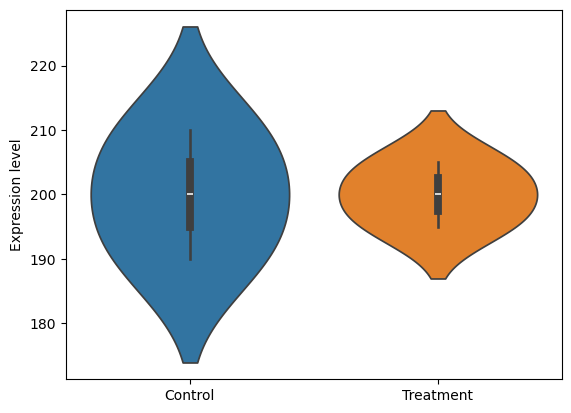

In [161]:
#Violinplot
gene_data= df.loc['Gene4']
data=[gene_data[control_col].values, gene_data[treatment_col].values]

sns.violinplot(data=data)
plt.xticks([0,1],['Control', 'Treatment'])
plt.ylabel('Expression level')
plt.show() 

/tmp/ipykernel_4240/1070484579.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df['Control_mean'][i]+10, df['Treatment_mean'][i],gene)


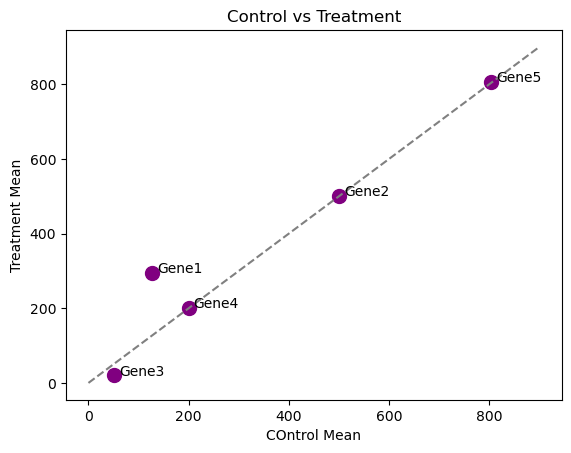

In [162]:
#ScatterPlot
plt.scatter(df['Control_mean'],df['Treatment_mean'],color='purple', s=100)
for i,gene in enumerate(df.index):
    plt.text(df['Control_mean'][i]+10, df['Treatment_mean'][i],gene)
plt.plot([0,900],[0,900],'--' , color='gray')
plt.xlabel('COntrol Mean')
plt.ylabel('Treatment Mean')
plt.title('Control vs Treatment')
plt.show()

In [163]:
#Volcano plot

In [164]:
df

,Control_1,Control_2,Control_3,Treatment_1,Treatment_2,Treatment_3,Control_mean,Treatment_mean,Log2Fold,Status
Gene1,120,135,128,280,295,310,127.666667,295.000000,1.208333,Upregulated
Gene2,500,480,520,490,510,505,500.000000,501.666667,0.004801,Upregulated
Gene3,50,55,48,20,18,22,51.000000,20.000000,-1.350497,Downregulated
Gene4,200,190,210,195,205,200,200.000000,200.000000,0.000000,No change
Gene5,800,820,790,810,795,815,803.333333,806.666667,0.005974,Upregulated


In [165]:
outpt_df= pd.DataFrame({
    'Control_mean': df['Control_mean'],
    'Treatement_mean': df['Treatment_mean'],
    'Log2C': df['Log2Fold'],
    'Status': df['Status'],
}, index=genes)
outpt_df.to_csv('Output.csv')
outpt_df

,Control_mean,Treatement_mean,Log2C,Status
Gene1,127.666667,295.000000,1.208333,Upregulated
Gene2,500.000000,501.666667,0.004801,Upregulated
Gene3,51.000000,20.000000,-1.350497,Downregulated
Gene4,200.000000,200.000000,0.000000,No change
Gene5,803.333333,806.666667,0.005974,Upregulated


In [166]:
data={
    'Gene': ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5','Gene6'],
    'DNA_sequence': [
        'ATGCGTAAAGCG', # Starts with ATG (start codon)
        'ATGGCTTGGTAA',
        'ATGAAATTTTAG',
        'ATGCCTTATTGA',
        'ATGGTCCATTAG',
        'ATGdTCCATTAG'
        
    ]
}

df=pd.DataFrame(data)
df

,Gene,DNA_sequence
0,Gene1,ATGCGTAAAGCG
1,Gene2,ATGGCTTGGTAA
2,Gene3,ATGAAATTTTAG
3,Gene4,ATGCCTTATTGA
4,Gene5,ATGGTCCATTAG
5,Gene6,ATGdTCCATTAG


In [167]:
def count_bases(seq):
    seq = str(seq).upper()  # ensure it's a string
    return pd.Series({
        'A_count': seq.count('A'),
        'T_count': seq.count('T'),
        'G_count': seq.count('G'),
        'C_count': seq.count('C')
    })

# Apply to DataFrame
df_counts = df['DNA_sequence'].apply(count_bases)

# Combine with original DataFrame
df = pd.concat([df, df_counts], axis=1)
df

,Gene,DNA_sequence,A_count,T_count,G_count,C_count
0,Gene1,ATGCGTAAAGCG,4,2,4,2
1,Gene2,ATGGCTTGGTAA,3,4,4,1
2,Gene3,ATGAAATTTTAG,5,5,2,0
3,Gene4,ATGCCTTATTGA,3,5,2,2
4,Gene5,ATGGTCCATTAG,3,4,3,2
5,Gene6,ATGdTCCATTAG,3,4,2,2


In [169]:
#Check whether Seq are valid
def check_valid(dna):
    valid_seq=['A','T','G','C']
    return all(base in valid_seq for base in dna)

df["is_valid"] = df["DNA_sequence"].apply(check_valid)
df

,Gene,DNA_sequence,A_count,T_count,G_count,C_count,is_valid
0,Gene1,ATGCGTAAAGCG,4,2,4,2,True
1,Gene2,ATGGCTTGGTAA,3,4,4,1,True
2,Gene3,ATGAAATTTTAG,5,5,2,0,True
3,Gene4,ATGCCTTATTGA,3,5,2,2,True
4,Gene5,ATGGTCCATTAG,3,4,3,2,True
5,Gene6,ATGdTCCATTAG,3,4,2,2,False


In [170]:
#Drop invalid Sequences
df = df[df["is_valid"]].drop(columns="is_valid")
df

,Gene,DNA_sequence,A_count,T_count,G_count,C_count
0,Gene1,ATGCGTAAAGCG,4,2,4,2
1,Gene2,ATGGCTTGGTAA,3,4,4,1
2,Gene3,ATGAAATTTTAG,5,5,2,0
3,Gene4,ATGCCTTATTGA,3,5,2,2
4,Gene5,ATGGTCCATTAG,3,4,3,2


In [172]:
def do_transcription(dna):
    complement={'A':'T', 'T':'A', 'G':'C','C':'G'}
    dna_seq= dna.upper()
    comp= ''.join(complement[base] for base in dna_seq)
    return comp.replace('T', 'U')


df['mRNA']=df['DNA_sequence'].apply(do_transcription)
df

,Gene,DNA_sequence,A_count,T_count,G_count,C_count,mRNA
0,Gene1,ATGCGTAAAGCG,4,2,4,2,UACGCAUUUCGC
1,Gene2,ATGGCTTGGTAA,3,4,4,1,UACCGAACCAUU
2,Gene3,ATGAAATTTTAG,5,5,2,0,UACUUUAAAAUC
3,Gene4,ATGCCTTATTGA,3,5,2,2,UACGGAAUAACU
4,Gene5,ATGGTCCATTAG,3,4,3,2,UACCAGGUAAUC


In [173]:
genetic_code = {
'AUG': 'M', 'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L',
'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S',
'UAU': 'Y', 'UAC': 'Y', 'UAA': '*', 'UAG': '*',
'UGU': 'C', 'UGC': 'C', 'UGA': '*', 'UGG': 'W',
'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L',
'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P',
'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q',
'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R',
'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'ACA': 'T',
'ACC': 'T', 'ACG': 'T', 'ACU': 'T',
'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K',
'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R',
'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V',
'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A',
'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E',
'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'
}


In [174]:
def do_translation(mrna):
    protein=''
    for i in range(0, len(mrna),3):
        codon=mrna[i:i+3]
        if len(codon) <3 :
            break

        amino_acid=genetic_code.get(codon,'?')

        if amino_acid == '*':
            break

        protein += amino_acid
    return protein



In [175]:
df['Protein']= df['mRNA'].apply(do_translation)
df

,Gene,DNA_sequence,A_count,T_count,G_count,C_count,mRNA,Protein
0,Gene1,ATGCGTAAAGCG,4,2,4,2,UACGCAUUUCGC,YAFR
1,Gene2,ATGGCTTGGTAA,3,4,4,1,UACCGAACCAUU,YRTI
2,Gene3,ATGAAATTTTAG,5,5,2,0,UACUUUAAAAUC,YFKI
3,Gene4,ATGCCTTATTGA,3,5,2,2,UACGGAAUAACU,YGIT
4,Gene5,ATGGTCCATTAG,3,4,3,2,UACCAGGUAAUC,YQVI


In [176]:
#GC_count
def gc_count(seq):
    count_g = seq.count('G')
    count_c = seq.count('C')
    total=len(seq)
    if total == 0 :
        return 0.0
    return round( ((count_g+count_c) / total) * 100, 2 )

df['GC_Count']= df.apply(lambda row: gc_count(row['DNA_sequence']), axis=1)
df    

,Gene,DNA_sequence,A_count,T_count,G_count,C_count,mRNA,Protein,GC_Count
0,Gene1,ATGCGTAAAGCG,4,2,4,2,UACGCAUUUCGC,YAFR,50.00
1,Gene2,ATGGCTTGGTAA,3,4,4,1,UACCGAACCAUU,YRTI,41.67
2,Gene3,ATGAAATTTTAG,5,5,2,0,UACUUUAAAAUC,YFKI,16.67
3,Gene4,ATGCCTTATTGA,3,5,2,2,UACGGAAUAACU,YGIT,33.33
4,Gene5,ATGGTCCATTAG,3,4,3,2,UACCAGGUAAUC,YQVI,41.67


In [177]:
#Calculate Identity Matrix
def calculate_identity_matrix(sequences):
    n = len(sequences)
    matrix = pd.DataFrame(index=range(n), columns=range(n), dtype=float)
    
    for i in range(n):
        for j in range(n):
            seq1 = sequences[i].upper()
            seq2 = sequences[j].upper()
            
            if len(seq1) != len(seq2):
                matrix.iloc[i, j] = 0
                continue
            
            matches = sum(seq1[k] == seq2[k] for k in range(len(seq1)))
            matrix.iloc[i, j] = (matches / len(seq1)) * 100
    
    return matrix

# Example usage
identity_matrix = calculate_identity_matrix(df['DNA_sequence'].tolist())
identity_matrix

,0,1,2,3,4
0,100.000000,33.333333,33.333333,50.000000,41.666667
1,33.333333,100.000000,50.000000,66.666667,50.000000
2,33.333333,50.000000,100.000000,50.000000,58.333333
3,50.000000,66.666667,50.000000,100.000000,50.000000
4,41.666667,50.000000,58.333333,50.000000,100.000000


In [178]:
#Calculate Similarity  Matrix
def calculate_similarity_matrix(df, seq_col='DNA_sequence', gene_col='Gene'):
    sequences = df[seq_col].tolist()
    genes = df[gene_col].tolist()
    n = len(sequences)
    
    similarity_matrix = pd.DataFrame(index=genes, columns=genes, dtype=float)
    
    for i in range(n):
        for j in range(n):
            seq1 = sequences[i].upper()
            seq2 = sequences[j].upper()
            
            # If lengths differ, return None
            if len(seq1) != len(seq2):
                similarity_matrix.iloc[i, j] = None
                continue
            
            matches = sum(seq1[k] == seq2[k] for k in range(len(seq1)))
            similarity = (matches / len(seq1)) * 100
            similarity_matrix.iloc[i, j] = similarity
    
    return similarity_matrix

# Usage
similarity_matrix = calculate_similarity_matrix(df)
similarity_matrix

,Gene1,Gene2,Gene3,Gene4,Gene5
Gene1,100.000000,33.333333,33.333333,50.000000,41.666667
Gene2,33.333333,100.000000,50.000000,66.666667,50.000000
Gene3,33.333333,50.000000,100.000000,50.000000,58.333333
Gene4,50.000000,66.666667,50.000000,100.000000,50.000000
Gene5,41.666667,50.000000,58.333333,50.000000,100.000000


In [179]:
#Identity and Similarity of two Sequences
def calculate_identity(seq1, seq2):
    matches = 0
    total = len(seq1)
    for i in range(total):
        if seq1[i] == seq2[i]:
            matches += 1
    identity_percentage = (matches / total) * 100
    return identity_percentage

def find_similarity(seq1, seq2):
    matches = 0
    total = min(len(seq1), len(seq2))
    for i in range(total):
        if seq1[i] == seq2[i]:
            matches += 1
    similarity = (matches / total) * 100
    return similarity

dnaSeq1='ATGGCTGAACTG'
dnaSeq2='ATGGCCGAATTG'
print("Sequence identity of dnaSeq1 and dnaSeq2:",calculate_identity(dnaSeq1,dnaSeq2))
print("Similarity of dnaSeq1 and dnaSeq2:",find_similarity(dnaSeq1,dnaSeq2))


Sequence identity of dnaSeq1 and dnaSeq2: 83.33333333333334
Similarity of dnaSeq1 and dnaSeq2: 83.33333333333334


In [180]:
#mutation
#Substitution Mutation
def substitutation_mutation(seq, pos,sub):
    seq= seq[:pos-1]+ sub + seq[pos:]
    return seq

#Insertion Mutation
def insertion_mutation(seq,pos,new):
    seq=seq[:pos-1]+ new + seq[pos-1:]
    return seq

#Deletion Mutation
def deletion_mutation(seq,pos):
    seq=seq[:pos-1]+ seq[pos:]
    return seq

dna_seq = 'ATGAAATTTTAG'
display(dna_seq)
display(substitutation_mutation(dna_seq, 3, 'C'))
display(insertion_mutation(dna_seq, 3, 'C'))
display(deletion_mutation(dna_seq, 3))

'ATGAAATTTTAG'

'ATCAAATTTTAG'

'ATCGAAATTTTAG'

'ATAAATTTTAG'

In [181]:
df_prot = pd.DataFrame({
'Gene': ['Gene1', 'Gene2', 'Gene3'],
'Original_Protein': ['MKVLAG', 'MALLKR', 'MTPKLR'],
'Mutated_Protein' : ['MKVLPG', 'MALQKR', 'MTPKLR']
})
df_prot

,Gene,Original_Protein,Mutated_Protein
0,Gene1,MKVLAG,MKVLPG
1,Gene2,MALLKR,MALQKR
2,Gene3,MTPKLR,MTPKLR


In [182]:
def find_iden(seq1,seq2):
    min_len= min(len(seq1), len(seq2))
    if min_len == 0:
        return 0.0

    match=0
    for i in range(min_len):
        if seq1[i] == seq2[i]:
            match +=1
    identity=(match/min_len)*100
    return round(identity,2)

df_prot['Identity']= df_prot.apply(lambda row: find_iden( row['Original_Protein'], row['Mutated_Protein']), axis=1)
df_prot


,Gene,Original_Protein,Mutated_Protein,Identity
0,Gene1,MKVLAG,MKVLPG,83.33
1,Gene2,MALLKR,MALQKR,83.33
2,Gene3,MTPKLR,MTPKLR,100.00


In [183]:
# # Very simple similarity groups
# similar_groups = {
# 'KRH': 'positive',
# 'DE': 'negative',
# 'AVLIMFWP': 'hydrophobic',
# 'STYCNGQ': 'polar'
# }
# # Make a lookup: which group each amino acid belongs to
# aa_to_group = {}
# for aas, group in similar_groups.items():
# for aa in aas:
# aa_to_group[aa] = group
# # display(aa_to_group)
# def similarity_percent(seq1, seq2):
# if len(seq1) == 0 or len(seq2) == 0:
# return 0.0
# similar = 0
# for a, b in zip(seq1, seq2):
# if a == b:
# similar += 1
# elif aa_to_group.get(a, '') == aa_to_group.get(b, ''):
# similar += 1
# return round((similar / len(seq1)) * 100, 2)
# # Apply
# df_prot['Similarity_%'] = df_prot.apply(
# lambda row: similarity_percent(row['Original_Protein'],␣
# ↪row['Mutated_Protein']), axis=1

In [184]:
#Motifs
def count_motifs(seq, len_mot):
    if len(seq) < len_mot or len_mot ==0:
        return 0
    return ( len(seq) - len_mot+1)

def find_motifs(seq, len_mot):
    if len(seq) <len_mot or len_mot == 0:
        return []

    motifs=[]
    for i in range(len(seq) - len_mot+1):
        motifs.append(seq[i:i+len_mot])

    return motifs

seq="ATGCGTAGCTAA"
count_mot= count_motifs(seq,3)
print(count_mot)
all_trimmers=find_motifs(seq,3)
print(all_trimmers)

10
['ATG', 'TGC', 'GCG', 'CGT', 'GTA', 'TAG', 'AGC', 'GCT', 'CTA', 'TAA']


In [185]:
def gloabl_alignment(seq1,seq2, match=1, mismatch=-1, gap=-2):
    n= len(seq1) +1
    m= len(seq2) +1
    matrix= np.zeros( (n,m), dtype=int)

    for i in range(n):
        matrix[i][0]= i * gap
    for j in range(m):
        matrix[0][j]= j * gap

    for i in range(1,n):
        for j in range(1,m):
            diagonal= matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            left= matrix[i][j-1] + gap
            up = matrix[i-1][j] +gap
            matrix[i][j] = max(diagonal,left,up)

    df_matrix= pd.DataFrame(matrix)
    df_matrix.index = ['-'] + list(seq1)
    df_matrix.columns= ['-'] + list(seq2)
    return df_matrix

seq1 = "MKVLAG"
seq2 = "MKVLPG"
matrix = gloabl_alignment(seq1, seq2)
print("Global Alignment Matrix:")
matrix

Global Alignment Matrix:


,-,M,K,V,L,P,G
-,0,-2,-4,-6,-8,-10,-12
M,-2,1,-1,-3,-5,-7,-9
K,-4,-1,2,0,-2,-4,-6
V,-6,-3,0,3,1,-1,-3
L,-8,-5,-2,1,4,2,0
A,-10,-7,-4,-1,2,3,1
G,-12,-9,-6,-3,0,1,4


In [186]:
#Local Alignment
def local_alignment(seq1,seq2, match=1, mismatch=-1, gap=-2):
    n= len(seq1) +1
    m= len(seq2) +1
    matrix= np.zeros( (n,m), dtype=int)

    for i in range(n):
        matrix[i][0]= 0
    for j in range(m):
        matrix[0][j]= 0

    for i in range(1,n):
        for j in range(1,m):
            diagonal= matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            left= matrix[i][j-1] + gap
            up = matrix[i-1][j] +gap
            matrix[i][j] = max(0,diagonal,left,up)

    df_matrix= pd.DataFrame(matrix)
    df_matrix.index = ['-'] + list(seq1)
    df_matrix.columns= ['-'] + list(seq2)
    return df_matrix

seq1 = "MKVLAG"
seq2 = "MKVLPG"
matrix = local_alignment(seq1, seq2)
print("Local Alignment Matrix:")
matrix

Local Alignment Matrix:


,-,M,K,V,L,P,G
-,0,0,0,0,0,0,0
M,0,1,0,0,0,0,0
K,0,0,2,0,0,0,0
V,0,0,0,3,1,0,0
L,0,0,0,1,4,2,0
A,0,0,0,0,2,3,1
G,0,0,0,0,0,1,4


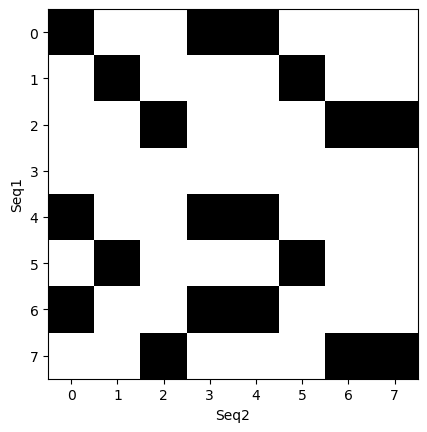

In [187]:
seq1 = 'ATGCATAG'
seq2 = 'ATGAATGG'

dot = [[1 if a==b else 0 for b in seq2] for a in seq1]
plt.imshow(dot, cmap='Greys', interpolation='nearest')
plt.xlabel('Seq2')
plt.ylabel('Seq1')
plt.show()

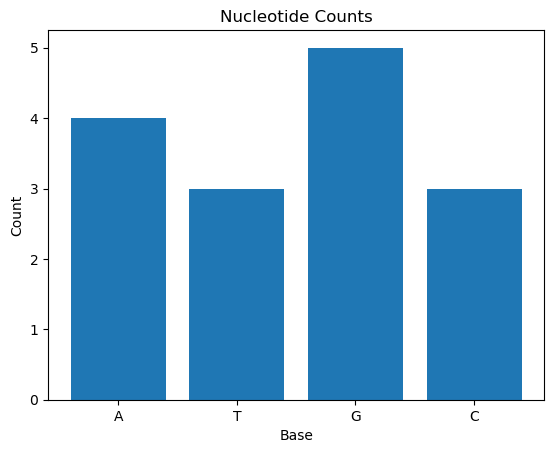

In [188]:
dna = "ATGCCGTAGCTAAGG"

counts = {"A":0, "T":0, "G":0, "C":0}
for b in dna:
    counts[b] += 1

plt.bar(counts.keys(), counts.values())
plt.title("Nucleotide Counts")
plt.xlabel("Base")
plt.ylabel("Count")
plt.show()

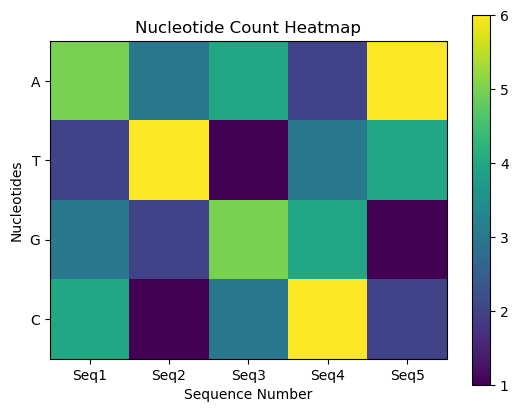

In [189]:
data = np.array([
    [5, 3, 4, 2, 6],   # A counts
    [2, 6, 1, 3, 4],   # T counts
    [3, 2, 5, 4, 1],   # G counts
    [4, 1, 3, 6, 2]    # C counts
])

plt.imshow(data)
plt.title("Nucleotide Count Heatmap")
plt.xlabel("Sequence Number")
plt.ylabel("Nucleotides")
plt.xticks(range(5), ["Seq1","Seq2","Seq3","Seq4","Seq5"])
plt.yticks(range(4), ["A","T","G","C"])
plt.colorbar()
plt.show()


In [190]:
def format_codon_table(raw_data):
    codon_dict = {}

    # Replace commas with spaces and split
    tokens = raw_data.replace(",", " ").split()

    # Read codon-amino acid pairs
    for i in range(0, len(tokens), 2):
        codon = tokens[i]
        amino_acid = tokens[i + 1]
        codon_dict[codon] = amino_acid

    return codon_dict


In [191]:
raw_codon_data = """
UUU F, UUC F, UUA L, UUG L
UCU S UCC S UCA S UCG S
UAU Y UAC Y UAA Stop UAG Stop
UGU C UGC C UGA Stop UGG W
"""

codon_table = format_codon_table(raw_codon_data)

print(codon_table)


{'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y', 'UAA': 'Stop', 'UAG': 'Stop', 'UGU': 'C', 'UGC': 'C', 'UGA': 'Stop', 'UGG': 'W'}


In [196]:
#Local Alignemnt 
seq1='GATTACA'
seq2="GCATGCU"

n=len(seq1) + 1
m=len(seq2) + 1

match = 1
mismatch = -1
gap = -2


score_matrix=np.zeros((n,m))

max_score=0
max_position=(0,0)

for i in range ( 1,n):
    for j in range(1, m):
        diagonal=score_matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
        up = score_matrix[i-1][j] + gap
        left=score_matrix[i][j-1] + gap

        score_matrix[i][j]= max(0,diagonal,up,left)

        if score_matrix[i][j] > max_score:
            max_score= score_matrix[i][j]
            max_position=(i,j)

print("Score Matrx: ")
print(score_matrix)

print(f"Maximum Score: {max_score} at position {max_position}" )

aligned_seq1=[]
aligned_seq2=[]
i,j= max_position

while i>0 and j >0 and score_matrix[i][j] !=0:
    if score_matrix[i][j] == score_matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
        aligned_seq1.append(seq1[i-1])
        aligned_seq2.append(seq2[j-1])
        i -= 1
        j -= 1
    elif score_matrix[i][j] == score_matrix[i-1][j] + gap:
        aligned_seq1.append(seq1[i-1])
        aligned_seq2.append('-')
        i -= 1
    else :
        aligned_seq1.append('-')
        aligned_seq2.append(seq2[j-1])
        j -= 1

aligned_seq1.reverse()
aligned_seq2.reverse()

print(aligned_seq1)
print(aligned_seq2)

            



Score Matrx: 
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]]
Maximum Score: 2.0 at position (3, 4)
['A', 'T']
['A', 'T']


In [206]:
#Global Alignemnt 
seq1 = "GATTACA"
seq2 = "GATCU"

n=len(seq1) + 1
m=len(seq2) + 1

match = 1
mismatch = -1
gap = -2

score_matrix=np.zeros((n,m))
for i in range (n):
    score_matrix[i][0] = i * gap
for j in range(m):
    score_matrix[0][j] = j * gap




for i in range (1,n):
    for j in range(1, m):
        diagonal=score_matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
        up = score_matrix[i-1][j] + gap
        left=score_matrix[i][j-1] + gap

        score_matrix[i][j]= max(diagonal,up,left)


print("Score Matrx: ")
print(score_matrix)


aligned_seq1=[]
aligned_seq2=[]
i=len(seq1)
j= len(seq2)

while i>0 or j >0 :
    if i >0 and j >0 and score_matrix[i][j] == score_matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
        aligned_seq1.append(seq1[i-1])
        aligned_seq2.append(seq2[j-1])
        i -= 1
        j -= 1
    elif i >0 and score_matrix[i][j] == score_matrix[i-1][j] + gap:
        aligned_seq1.append(seq1[i-1])
        aligned_seq2.append('_')
        i = i-1
    else :
        aligned_seq1.append('_')
        aligned_seq2.append(seq2[j-1])
        j = j-1

aligned_seq1.reverse()
aligned_seq2.reverse()

print(aligned_seq1)
print(aligned_seq2)


            



Score Matrx: 
[[  0.  -2.  -4.  -6.  -8. -10.]
 [ -2.   1.  -1.  -3.  -5.  -7.]
 [ -4.  -1.   2.   0.  -2.  -4.]
 [ -6.  -3.   0.   3.   1.  -1.]
 [ -8.  -5.  -2.   1.   2.   0.]
 [-10.  -7.  -4.  -1.   0.   1.]
 [-12.  -9.  -6.  -3.   0.  -1.]
 [-14. -11.  -8.  -5.  -2.  -1.]]
['G', 'A', 'T', 'T', 'A', 'C', 'A']
['G', 'A', '_', 'T', '_', 'C', 'U']
